In [1]:
using PyPlot

INFO: Loading help data...


### library functions

In [2]:
function rk2(func, x0, dt, n)
    X = Array(Float64,(length(x0), n))
    T = linspace(0, (n-1)*dt, n)
    X[:,1] = x0
    for i = 2:n
        k1 = func(X[:,i-1], T[i-1])
        k2 = func(X[:,i-1] + 0.5*dt*k1, T[i-1] + 0.5*dt)
        X[:,i] = X[:,i-1] + dt*k2
    end
    return T, X
end

rk2 (generic function with 1 method)

In [3]:
function rk2_with_derivs(func, jacobian, x0, dt, n)
    X = Array(Float64,(length(x0), n))
    T = linspace(0, (n-1)*dt, n)
    deriv = eye(length(x0))
    X[:,1] = x0
    for i = 2:n
        k1 = func(X[:,i-1], T[i-1])
        k2 = func(X[:,i-1] + 0.5*dt*k1, T[i-1] + 0.5*dt)
        X[:,i] = X[:,i-1] + dt*k2
        deriv *= (eye(length(x0)) + 0.5*dt*jacobian(X[:,i-1], T[i-1]))
        deriv *= (eye(length(x0)) + 0.5*dt*jacobian(X[:,i-1] + 0.5*dt*k1, T[i-1] + 0.5*dt))
    end
    return T, X, deriv
end

rk2_with_derivs (generic function with 1 method)

In [4]:
function newton(function_and_derivative, initial_guess, tol)
    x = initial_guess
    f_of_x, df_of_x = function_and_derivative(initial_guess)
    while norm(f_of_x) > tol
        x -= df_of_x\f_of_x
        f_of_x, df_of_x = function_and_derivative(x)
    end
    return x
end

newton (generic function with 1 method)

### problem specific

In [5]:
function harmonic(x,t)
    return [x[2], -x[1]]
end

harmonic (generic function with 1 method)

In [6]:
function jacobian(x,t)
    return [0 1; -1 0]
end

jacobian (generic function with 1 method)

In [27]:
function ten_seconds_later(initial_velocity)
    _, X, derivs = rk2_with_derivs(harmonic, jacobian, [1.0, initial_velocity], 0.01, 1001)
    return X[2,end], derivs[2,2]
end

ten_seconds_later (generic function with 1 method)

In [28]:
v_init = newton(ten_seconds_later, 0.0, 1e-10)

0.6485975745646286

In [29]:
T, X = rk2(harmonic, [1.0, v_init], 0.01, 1001)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0],
2x1001 Array{Float64,2}:
 1.0       1.00644   1.01277   1.01901  1.02514   …  -1.19186    -1.19192    
 0.648598  0.638565  0.628469  0.61831  0.608089     -0.0119192   3.18145e-12)

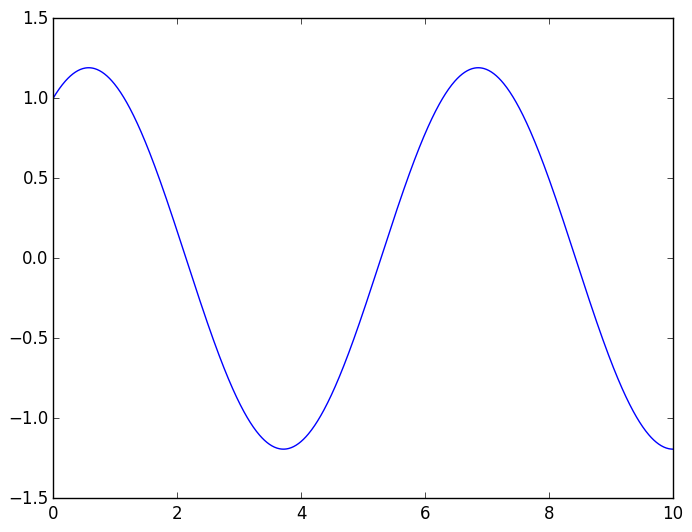

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f200c92ef10>

In [30]:
plot(T, X[1,:][:])